# Concept

```{contents}
:local:
```

In [1]:
import sys
from pathlib import Path
parent_dir = str(Path().resolve().parents[3])
sys.path.append(parent_dir)

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## PMF and CDF of Poisson Distribution

```{prf:definition} Poisson Distribution
:label: def:poi

Let $X$ be a **Poisson random variable**. Then the probability mass function (PMF) of $X$ is given by

$$
\P \lsq X = k \rsq = e^{-\lambda} \cdot \frac{\lambda^k}{k!} \qquad \text{for } k = 0, 1, 2, \ldots
$$

where $\lambda > 0$ is called the Poisson parameter.

We write

$$
X \sim \poisson(\lambda)
$$

to say that $X$ is drawn from a Poisson distribution with parameter $\lambda$.

Some conventions:

1. The parameter $\alpha$ determines the ***average rate of occurrences over time or space*** {cite}`foundations_of_data_science_with_python_2021`.
2. $T$ is a length of time/space being considered.
3. $\lambda = \alpha T$ is the ***average number of occurrences*** over the time/space being considered.
```

## Plotting PMF and CDF of Poisson Distribution

The below plot shows the PMF and its Empirical Histogram distribution for a
Poisson distribution with $\lambda \in \lset 5, 10, 20 \rset$.

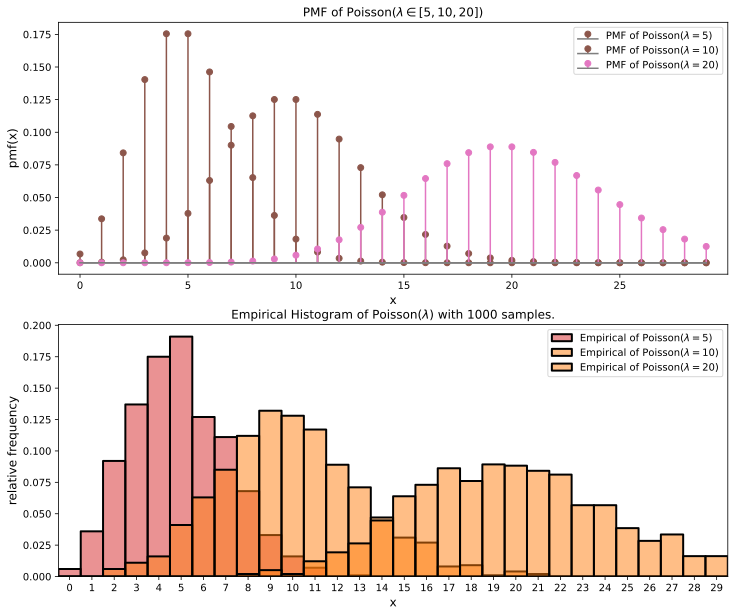

In [2]:
from omnivault.utils.probability_theory.plot import plot_poisson_pmfs, plot_empirical_poisson

_fig, axes = plt.subplots(2, 1, figsize=(12, 10), dpi=125)
lambdas = [5, 10, 20]
plot_poisson_pmfs(lambdas=lambdas, ax=axes[0])
plot_empirical_poisson(lambdas=lambdas, ax=axes[1])
plt.show()

(poisson_assumptions)=

## Assumptions

The Poisson distribution needs to satisfy the following assumptions before it
can be used:

1. An event can occur zero or more times in a fixed interval of time/space. In
   other words, $k$ can be any non-negative integer.
2. Events are independent of each other. In other words, the occurrence of one
   event does not affect the occurrence of another event.
3. The average rate of occurrence of an event is constant over time/space. In
   other words, $\lambda$ is constant and does not change over time/space.
4. Two events cannot occur at the same instance in time/space. In other words,
   at very small time/space interval $\Delta t$, either exactly one event occurs
   or no event occurs.
5. The **_linearity assumption_**, the probability of an event occurring is
   proportional to the length of the time period. For example, it should be
   twice as likely for an event to occur in a 2 hour time period than it is for
   an event to occur in a 1 hour period[^linearity_assumption].
6. The value of $\lambda$ is proportional to the length of the time period.

```{admonition} Where did these Assumptions come from?
:class: tip

See chapter 3.5.4 on section Origin of the Poisson random variable of {cite}`chan_2021`.
```

```{prf:example} Example
:label: ex:poi

For example, the Poisson distribution is appropriate for modeling the number of phone calls an
office would receive during the noon hour, if they know that they average $4$ calls
per hour during that time period.

1. In the time period of one hour, the number of phone calls can be any non-negative integer. $4$ just happens to be the average number of phone calls for that observed time period.
2. The occurrence of one phone call does not affect the occurrence of another phone call. Caller A's phone call does not affect the occurrence of caller B's phone call in this time period.
3. The average rate of occurrence of a phone call is constant over the time period. The average rate of occurrence of a phone call is $4$ per hour. This may vary slightly but it is an assumption that we are making.
4. The probability of more than one event occurring in a very small time period is near zero. It is unlikely that two phone calls will occur at the exact same time (ok maybe not but it is an assumption we are making).
5. In an one hour time period, $\P \lsq X = 2 \rsq = \frac{4^2}{2!} \cdot e^{-4} = 0.0183$. Then if we were to ask
in a two hour time period, then $\P \lsq X = 2 \rsq = 2 \cdot 0.0183 = 0.0366$. This is a linear assumption.
6. For example, if the average rate of occurrence of an event is 1 per hour, then the average rate of occurrence of an event is 2 per 2 hours. Same idea as point 5.
```

```{prf:example} Counter Example
:label: ex:poi2

The number of students who arrive at the student union per minute will likely not follow a Poisson distribution,
because the rate is not constant (low rate during class time, high rate between class times)
and the arrivals of individual students are not independent (students tend to come in groups) {cite}`wikipedia_poisson_distribution`.
```

## Properties

```{prf:property} Expectation of Poisson Distribution
:label: prop:poi_exp

Let $X \sim \poisson(\lambda)$ be a Poisson random variable with parameter $\lambda$. Then the expectation of $X$ is given by

$$
\expectation \lsq X \rsq = \sum_{k=0}^{\infty} k \cdot \P \lsq X = k \rsq = \lambda
$$
```

```{prf:property} Variance of Poisson Distribution
:label: prop:poi_var

Let $X \sim \poisson(\lambda)$ be a Poisson random variable with parameter $\lambda$. Then the variance of $X$ is given by

$$
\var \lsq X \rsq = \expectation \lsq X^2 \rsq - \expectation \lsq X \rsq^2 = \lambda
$$
```

```{prf:property} Sum of Independent Poisson Random Variables
:label: prop_sum_poi

Let $X_1, X_2, \ldots, X_n$ be independent Poisson random variables with parameter $\lambda_i$
for $i \in \lset 1, 2, \ldots n \rset$. Then the sum of these $n$ random variables
is also a Poisson random variable with parameter $\lambda = \sum_{i=1}^n \lambda_i$.
```

## Poisson Approximation to Binomial Distribution

```{prf:theorem} Poisson Approximation to Binomial Distribution
:label: thm:poi_bin

For situations where the number of trials $n$ is large and the probability of success $p$ is small,
the Poisson distribution is a good approximation to the Binomial distribution.

Recall the Binomial distribution is given by

$$
X \sim \binomial(n, p) \qquad \text{with PMF} \qquad \P \lsq X = k \rsq = \binom{n}{k} p^k (1-p)^{n-k} \qquad \text{for } k = 0, 1, 2, \ldots, n
$$

Then the approximation is given by

$$
\binom{n}{k} p^k (1-p)^{n-k} \approx e^{-\lambda} \cdot \frac{\lambda^k}{k!} !\qquad \text{for } k = 0, 1, 2, \ldots
$$

where $\lambda = np$.

Many times, Poisson PMF is much easier to compute than its Binomial counterpart.
```

## Further Readings

-   Chan, Stanley H. "Chapter 3.5.4. Poisson random variable." In Introduction
    to Probability for Data Science, 152-164. Ann Arbor, Michigan: Michigan
    Publishing Services, 2021.

[^linearity_assumption]:
    Be careful, this only holds in a small time interval, i.e.
    $\P \lsq X(t + \Delta t) - X(t) = 1 \rsq = \lambda \Delta t$ for
    sufficiently small $\Delta t$ {cite}`chan_2021`.